In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
from skimage.exposure import equalize_hist
from skimage.filters import *
from skimage.measure import find_contours
from skimage.morphology import *
from skimage.transform import *
from skimage.util import *
from skimage import data
import matplotlib.pyplot as plt
import cv2 as cv 
import os


In [2]:
def binarize(img):
    if len(img.shape) > 2 :
        img = (rgb2gray(img)*255).astype("uint8")
    #thresh_local = threshold_local(img, 31, offset=3)
    thresh_sauvola = threshold_sauvola(img, 31)
    return img >= thresh_sauvola

def get_rotation_angle(img):
    # using hough transform to measure the angle
    img = invert(img)
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
    h, theta, d = hough_line(img, theta=tested_angles)
    ind = np.unravel_index(np.argmax(h, axis=None), h.shape)
    degree = np.rad2deg(theta[ind[1]])
    return degree

def fix_rotation(img, angle):
    if angle > 0:
        img = rotate(img, -(90-angle))
    else:
        img = rotate(img, 90 - abs(angle))
    return img


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


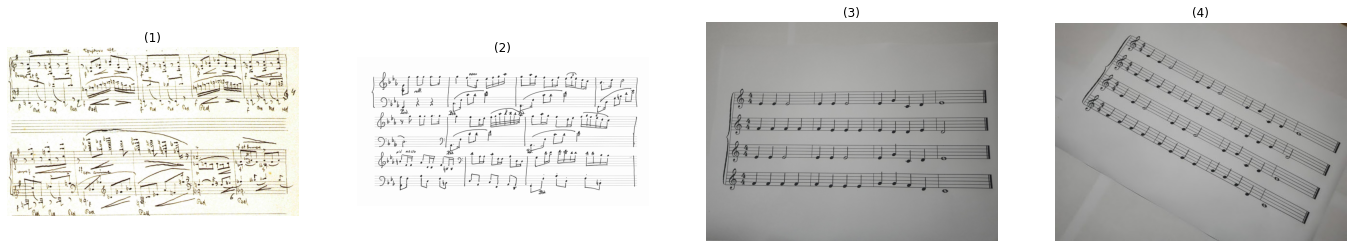

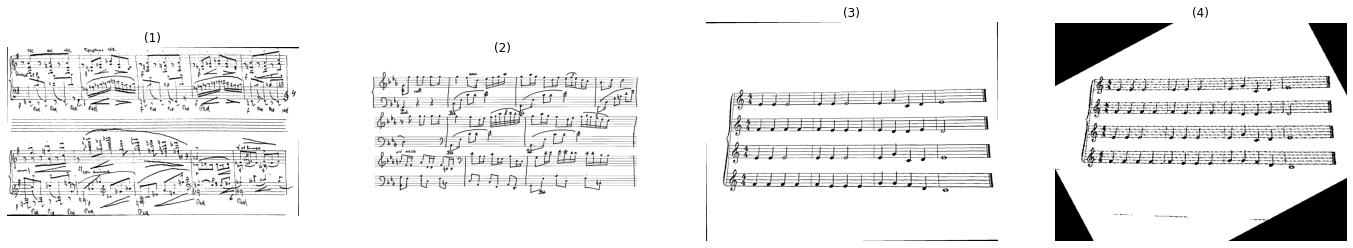

In [3]:
input_imgs = []
output_imgs = []

for filename in os.listdir("input"):
    img = io.imread("input/" + filename)
    input_imgs.append(img)
    img = binarize(img)
    img = fix_rotation(img, get_rotation_angle(img))
    io.imsave("output/" + os.path.splitext(filename)[0] + ".png", img)
    output_imgs.append(img)

show_images(input_imgs)
show_images(output_imgs)